### Import libraries 

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white')

## Load data from final csv

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          564 non-null    object 
 1   Married         564 non-null    object 
 2   Dependents      564 non-null    int64  
 3   Education       564 non-null    object 
 4   SelfEmployed    564 non-null    object 
 5   LoanAmountTerm  564 non-null    float64
 6   CreditHistory   564 non-null    float64
 7   PropertyArea    564 non-null    object 
 8   LoanStatus      564 non-null    int64  
 9   LoanAmountLog   564 non-null    float64
 10  IncomeLog       564 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 48.6+ KB


In [4]:
X = train.drop(columns=['LoanStatus'])
y = train.LoanStatus

In [5]:
X = pd.get_dummies(X)  # One Hot Encoding 

In [6]:
X.columns

Index(['Dependents', 'LoanAmountTerm', 'CreditHistory', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Dependents              564 non-null    int64  
 1   LoanAmountTerm          564 non-null    float64
 2   CreditHistory           564 non-null    float64
 3   LoanAmountLog           564 non-null    float64
 4   IncomeLog               564 non-null    float64
 5   Gender_Female           564 non-null    uint8  
 6   Gender_Male             564 non-null    uint8  
 7   Married_No              564 non-null    uint8  
 8   Married_Yes             564 non-null    uint8  
 9   Education_Graduate      564 non-null    uint8  
 10  Education_Not Graduate  564 non-null    uint8  
 11  SelfEmployed_No         564 non-null    uint8  
 12  SelfEmployed_Yes        564 non-null    uint8  
 13  PropertyArea_Rural      564 non-null    uint8  
 14  PropertyArea_Semiurban  564 non-null    ui

In [31]:
X.shape

(564, 16)

In [32]:
X.sample(5)

,Dependents,LoanAmountTerm,CreditHistory,LoanAmountLog,IncomeLog,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,SelfEmployed_No,SelfEmployed_Yes,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
490,0,360.0,1.0,4.836282,8.432071,0,1,1,0,0,1,1,0,1,0,0
147,0,360.0,1.0,4.584967,7.973844,0,1,0,1,0,1,1,0,0,1,0
365,0,360.0,1.0,4.553877,8.410053,0,1,0,1,1,0,1,0,0,0,1
69,3,360.0,0.0,4.553877,8.466952,0,1,0,1,0,1,1,0,0,1,0
116,3,360.0,1.0,5.913503,10.077567,0,1,0,1,1,0,1,0,1,0,0


### Split data into train and test data 

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [29]:
def print_scores(y_true, y_pred):
    cm = confusion_matrix(y_true,y_pred)
    tn = cm[0,0]
    tp = cm[1,1]
    fp = cm[0,1]
    fn = cm[1,0]
    print(f"Overall Accuracy             : {(tp + tn) / (tp + fp + tn + fn):.2f}")
    print(f"Precision                    : {tp / (tp + fp):.2f}")
    print(f"Recall or TPR or Sensitivity : {tp / (tp + fn):.2f}")
    print(f"Specificity or TNR           : {tn / (tn + fp):.2f}")      

## Logistic Regression

In [9]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X_train)  # Find out mean and std in data 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
ss.mean_, ss.var_

(array([8.00443459e-01, 3.42172949e+02, 8.38137472e-01, 4.84777596e+00,
        8.65629329e+00, 1.75166297e-01, 8.24833703e-01, 3.59201774e-01,
        6.40798226e-01, 7.91574279e-01, 2.08425721e-01, 8.66962306e-01,
        1.33037694e-01, 2.90465632e-01, 3.90243902e-01, 3.19290466e-01]),
 array([1.07769382e+00, 4.15737142e+03, 1.35663050e-01, 2.57676031e-01,
        2.88927291e-01, 1.44483065e-01, 1.44483065e-01, 2.30175860e-01,
        2.30175860e-01, 1.64984440e-01, 1.64984440e-01, 1.15338666e-01,
        1.15338666e-01, 2.06095349e-01, 2.37953599e-01, 2.17344064e-01]))

In [12]:
# Transform both train and test data with the same scale 
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [13]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
# Check model's performance with train data 
model.score(X_train_scaled,y_train)

0.8248337028824834

In [15]:
y_pred = model.predict(X_test_scaled)

In [16]:
model.score(X_test_scaled,y_test)

0.7787610619469026

In [17]:
confusion_matrix(y_test,y_pred)

array([[13, 22],
       [ 3, 75]], dtype=int64)

In [45]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.78
Precision                    : 0.77
Recall or TPR or Sensitivity : 0.96
Specificity or TNR           : 0.37


### Display classification report

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.37      0.51        35
           1       0.77      0.96      0.86        78

    accuracy                           0.78       113
   macro avg       0.79      0.67      0.68       113
weighted avg       0.79      0.78      0.75       113



In [18]:
y_pred_prob = model.predict_proba(X_test_scaled)

In [19]:
y_pred_prob[:5]

array([[0.24778533, 0.75221467],
       [0.10699829, 0.89300171],
       [0.12604105, 0.87395895],
       [0.12853865, 0.87146135],
       [0.23119301, 0.76880699]])

In [20]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
model.score(X_train,y_train)

0.8536585365853658

In [52]:
y_pred = model.predict(X_test)

In [53]:
confusion_matrix(y_test,y_pred)

array([[15, 20],
       [ 4, 74]], dtype=int64)

In [54]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.79
Precision                    : 0.79
Recall or TPR or Sensitivity : 0.95
Specificity or TNR           : 0.43


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.43      0.56        35
           1       0.79      0.95      0.86        78

    accuracy                           0.79       113
   macro avg       0.79      0.69      0.71       113
weighted avg       0.79      0.79      0.77       113



### Decision Tree Created by Classifier

In [56]:
# Print tree generated by DecisionTreeClassifier
from sklearn.tree import export_text
tree_rules = export_text(model, feature_names=list(X_train))
print(tree_rules)

|--- CreditHistory <= 0.50
|   |--- LoanAmountLog <= 6.30
|   |   |--- LoanAmountLog <= 4.86
|   |   |   |--- class: 0
|   |   |--- LoanAmountLog >  4.86
|   |   |   |--- LoanAmountLog <= 4.88
|   |   |   |   |--- class: 1
|   |   |   |--- LoanAmountLog >  4.88
|   |   |   |   |--- PropertyArea_Semiurban <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- PropertyArea_Semiurban >  0.50
|   |   |   |   |   |--- class: 0
|   |--- LoanAmountLog >  6.30
|   |   |--- class: 1
|--- CreditHistory >  0.50
|   |--- IncomeLog <= 9.90
|   |   |--- IncomeLog <= 7.78
|   |   |   |--- PropertyArea_Semiurban <= 0.50
|   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- PropertyArea_Semiurban >  0.50
|   |   |   |   |--- class: 1
|   |   |--- IncomeLog >  7.78
|   |   |   |--- LoanAmountTerm <= 48.00
|   |   |   |   |--- class: 0
|   |   |   |--- LoanAmountTerm >  48.00
|   |   |

### Random Forest

In [57]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [58]:
model = RandomForestClassifier(n_estimators=3, max_depth=3)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
model.score(X_train,y_train)

0.8203991130820399

In [60]:
y_pred = model.predict(X_test)

In [61]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.75
Precision                    : 0.75
Recall or TPR or Sensitivity : 0.96
Specificity or TNR           : 0.29


In [62]:
# Print internal decision trees
for count, tree in enumerate(model.estimators_):
      # Print tree for each classifier 
      tree_rules = export_text(tree, feature_names =  list(X_train.columns))
      print("Tree : ",count + 1)
      print(tree_rules)      

Tree :  1
|--- LoanAmountLog <= 5.55
|   |--- LoanAmountLog <= 5.23
|   |   |--- LoanAmountTerm <= 48.00
|   |   |   |--- class: 0.0
|   |   |--- LoanAmountTerm >  48.00
|   |   |   |--- class: 1.0
|   |--- LoanAmountLog >  5.23
|   |   |--- CreditHistory <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- CreditHistory >  0.50
|   |   |   |--- class: 1.0
|--- LoanAmountLog >  5.55
|   |--- LoanAmountLog <= 5.91
|   |   |--- Education_Not Graduate <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Education_Not Graduate >  0.50
|   |   |   |--- class: 1.0
|   |--- LoanAmountLog >  5.91
|   |   |--- CreditHistory <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- CreditHistory >  0.50
|   |   |   |--- class: 1.0

Tree :  2
|--- PropertyArea_Rural <= 0.50
|   |--- Dependents <= 2.50
|   |   |--- PropertyArea_Urban <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- PropertyArea_Urban >  0.50
|   |   |   |--- class: 1.0
|   |--- Dependents >  2.50
|   |   |--- SelfEmployed_Yes <= 0.50
|   |   |   |

## KNN 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
model.score(X_train,y_train)

0.6319290465631929

In [33]:
y_pred = model.predict(X_test_scaled)

In [34]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.75
Precision                    : 0.76
Recall or TPR or Sensitivity : 0.94
Specificity or TNR           : 0.34


## Naive Bayes 

In [35]:
from sklearn.naive_bayes import GaussianNB

In [37]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
model.score(X_train,y_train)

0.8181818181818182

In [39]:
y_pred = model.predict(X_test)

In [40]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.79
Precision                    : 0.79
Recall or TPR or Sensitivity : 0.95
Specificity or TNR           : 0.43


## Support Vector Machines

In [73]:
from sklearn.svm import SVC

In [74]:
model = SVC()
model.fit(X_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
model.score(X_train_scaled,y_train)

0.8337028824833703

In [76]:
y_pred = model.predict(X_test_scaled)

In [77]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.78
Precision                    : 0.77
Recall or TPR or Sensitivity : 0.96
Specificity or TNR           : 0.37


### GradientBoostingClassifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [80]:
model.score(X_train,y_train)

0.9046563192904656

In [81]:
y_pred = model.predict(X_test)

In [82]:
print_scores(y_test,y_pred)

Overall Accuracy             : 0.79
Precision                    : 0.79
Recall or TPR or Sensitivity : 0.94
Specificity or TNR           : 0.46


In [83]:
cm = confusion_matrix(y_test,y_pred)

Text(30.5, 0.5, 'Actual')

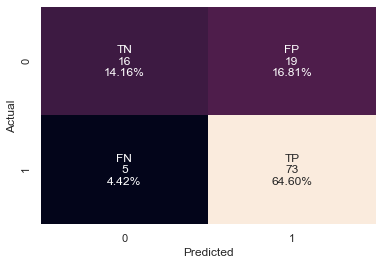

In [99]:
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='',cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")